<a href="https://colab.research.google.com/github/ishwarvenugopal/CE888_Data_Science_and_Decision_Making/blob/master/Project/Assignment_2/Assignment2_Dataset_1_LowImbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

## Load Data

In [21]:
df=pd.read_csv('/content/Dataset1_low.csv')
df.head()

,gender,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,class_attribute,age_
0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40.000000,30.000000,0,1,1,0.95,2440.0,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,2,15.700000,0.20,71.658458,26.132335,399.772698,0,0.827957
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,75,1.449521,0.000000,1,1,2,1.58,110.0,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,1,10.000000,1.40,53.000000,22.000000,111.000000,0,0.806452
2,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,49,0.000000,0.000000,0,1,1,1.40,138.9,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,5,2.600000,2.19,171.000000,126.000000,1452.000000,0,0.526882
3,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,61,0.006973,20.000000,3,1,1,1.46,9860.0,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,2,9.000000,1.30,42.000000,25.000000,706.000000,0,0.655914
4,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,41,52.389143,46.519351,0,1,2,1.05,100809.0,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,5,2.825013,1.10,42.373775,17.538103,202.523324,0,0.440860


In [0]:
#Rearranging the columns such that the class attributes become the last column

cols=list(df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
df=df[cols]

In [23]:
columns=df.columns
columns

Index(['gender', 'symptoms', 'alcohol', 'hepatitis_b_surface_antigen',
       'hepatitis_b_e_antigen', 'hepatitis_b_core_antibody',
       'hepatitis_c_virus_antibody', 'cirrhosis', 'endemic_countries',
       'smoking', 'diabetes', 'obesity', 'hemochromatosis',
       'arterial_hypertension', 'chronic_renal_insufficiency',
       'human_immunodeficiency_virus', 'nonalcoholic_steatohepatitis',
       'esophageal_varices', 'splenomegaly', 'portal_hypertension',
       'portal_vein_thrombosis', 'liver_metastasis', 'radiological_hallmark',
       'age', 'grams_of_alcohol_per_day', 'packs_of_cigarets_per_year',
       'performance_status', 'encephalopathy_degree', 'ascites_degree',
       'international_normalised_ratio', 'alpha-fetoprotein', 'haemoglobin',
       'mean_corpuscular_volume', 'leukocytes', 'platelets', 'albumin',
       'total_bilirubin', 'alanine_transaminase', 'aspartate_transaminase',
       'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'total_proteins',
       'c

## Defining Train and Test Data

In [0]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Decision Tree 

              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.62      0.90      0.73        20

    accuracy                           0.61        33
   macro avg       0.56      0.53      0.48        33
weighted avg       0.57      0.61      0.54        33



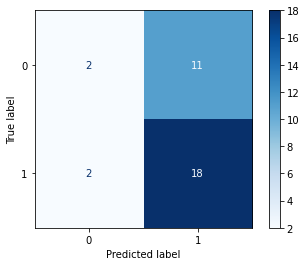

In [26]:
clf_dt=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_dt.fit(X_train,y_train)
y_predict=clf_dt.predict(X_test)
plot_confusion_matrix(clf_dt,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [27]:
score1=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1))

score2 = cross_val_score(clf_dt, X_train, y_train, cv=10)
print(score2)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))

score3 = cross_val_score(clf_dt, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3.mean(),score3.std()))


Accuracy (without cross-validation) : 0.6060606060606061
[0.57142857 0.64285714 0.53846154 0.76923077 0.61538462 0.76923077
 0.53846154 0.69230769 0.46153846 0.69230769]
Accuracy (after cross-validation): 0.6291208791208791 (+/- 0.09771109474603704)
[ 0.14285714  0.1025641   0.09302326  0.49350649  0.26966292  0.49350649
 -0.14705882  0.2972973  -0.18181818  0.35      ]
Cohen Kappa Score (after cross-validation): 0.19135407015462044 (+/- 0.22333882870852947)


In [0]:
#cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

## Baseline 2: Random Forest

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.74      0.85      0.79        20

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33



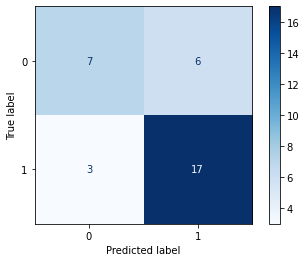

In [29]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [30]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))


Accuracy (without cross-validation) : 0.7272727272727273
[0.64285714 0.64285714 0.69230769 0.61538462 0.61538462 0.69230769
 0.84615385 0.61538462 0.53846154 0.69230769]
Accuracy (after cross-validation): 0.6593406593406594 (+/- 0.07688382043829363)
[ 0.18604651  0.1025641   0.39534884  0.15584416  0.15584416  0.2972973
  0.675       0.21686747 -0.05405405  0.2972973 ]
Cohen Kappa Score (after cross-validation): 0.24280557735096825 (+/- 0.18515194484876535)


In [0]:
#cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset 

In [13]:
#Original Imbalance

target_count=df.class_attribute.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)


1    102
0     63
Name: class_attribute, dtype: int64
61.81818181818181


In [0]:
def create_bins (df,no_of_bins,orig_imbalance):
  df_class0=df[df['class_attribute']==0]
  df_class1=df[df['class_attribute']==1]

  len0=int(len(df_class0)/no_of_bins)
  len1=int(len(df_class1)/no_of_bins)

  ind0=0
  ind1=0
  start0=0
  start1=0

  bins=[]

  print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
  for i in range(no_of_bins):
    ind0+=len0
    ind1+=len1
    bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
    target_cnt=bin_.class_attribute.value_counts()
    imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(bin_.values)
    start0+=len0
    start1+=len1

  return bins



In [15]:
bins= create_bins(df,10, imbalance_target) #Partitioning the dataset into 10 bins

Original Imbalance in the dataset: 61.81818181818181 %
Class imbalance ratio in bin 0 : 62.5 %
Class imbalance ratio in bin 1 : 62.5 %
Class imbalance ratio in bin 2 : 62.5 %
Class imbalance ratio in bin 3 : 62.5 %
Class imbalance ratio in bin 4 : 62.5 %
Class imbalance ratio in bin 5 : 62.5 %
Class imbalance ratio in bin 6 : 62.5 %
Class imbalance ratio in bin 7 : 62.5 %
Class imbalance ratio in bin 8 : 62.5 %
Class imbalance ratio in bin 9 : 62.5 %


In [0]:
model_accuracies={} #A dictionary to save the accuracies for the different permutations of the bins
model_kappa_scores={} #A dictionary to save the cohen kappa scores for the different permutations of the bins

## Analyzing the number of clusters using Elbow method and Silhouette method

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


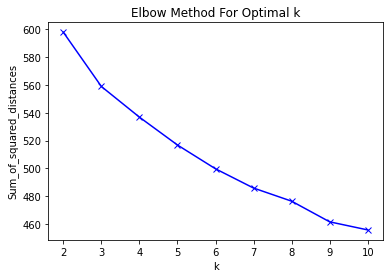

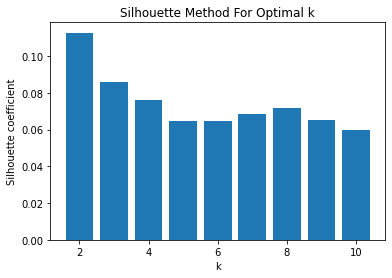

In [17]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=9 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [18]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=3 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
  g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
  g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['class_attribute']==min_class]
  if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
    g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
    g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
    g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
    g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
    g['Class_val_{}{}'.format(i,min_class)]=min_class
  else:
    g['Class_val_{}{}'.format(i,min_class)]=max_class
  
#CREATING THE TEST DATA

test_cluster=pd.DataFrame(test_data)
test_cluster.columns=df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
  g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
  if(len(g['test_{}'.format(i)])!=0):
    if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
      g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
      g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
      g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
    else:
      g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

Accuracy : 0.5625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
#model_accuracies

In [0]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
acc_values

array([0.6875, 0.5625, 0.8125, 0.875 , 0.5625, 0.6875, 0.6875, 0.6875,
       0.625 , 0.5625])

In [0]:
#model_kappa_scores

In [0]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
kappa_values

array([0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962,
       0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962])

In [37]:
print("Decision Tree model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))
print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Decision Tree model:
Accuracy (after cross-validation): 0.6291208791208791 (+/- 0.09771109474603704)
Random Forest model:
Accuracy (after cross-validation): 0.6593406593406594 (+/- 0.07688382043829363)
New model:
Accuracy : 0.675 (+/- 0.09999999999999999)


In [38]:
print("Kappa Scores:")
print("Decision Tree: : {} (+/- {})".format(score3.mean(),score3.std()))
print("Random Forest: : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))
print("New Model: : {} (+/- {})".format(kappa_values.mean(),kappa_values.std()))

Kappa Scores:
Decision Tree: : 0.19135407015462044 (+/- 0.22333882870852947)
Random Forest: : 0.24280557735096825 (+/- 0.18515194484876535)
New Model: : 0.40480962 (+/- 0.0)


## Permutation Tests

In [0]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [40]:
acc_old_1 = np.array([0.57142857, 0.64285714, 0.53846154, 0.76923077, 0.61538462, 0.76923077, 0.53846154, 0.69230769, 0.46153846, 0.69230769])
kappa_old_1=np.array([ 0.14285714,  0.1025641,   0.09302326,  0.49350649,  0.26966292,  0.49350649, -0.14705882,  0.2972973,  -0.18181818,  0.35      ])
acc_old_2=np.array([0.64285714, 0.64285714, 0.69230769, 0.61538462, 0.61538462, 0.69230769, 0.84615385, 0.61538462, 0.53846154, 0.69230769])
kappa_old_2=np.array([ 0.18604651,  0.1025641,   0.39534884,  0.15584416,  0.15584416,  0.2972973,  0.675, 0.21686747, -0.05405405,  0.2972973 ])

acc_new=np.array([0.6875, 0.5625, 0.8125, 0.875 , 0.5625, 0.6875, 0.6875, 0.6875, 0.625 , 0.5625])
kappa_new=np.array([0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962, 0.40480962])

#Accuracy: DT and new
mean_old=acc_old_1.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_1,acc_new,t_obs)
print("Accuracy comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Accuracy: RF and new
mean_old=acc_old_2.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_2,acc_new,t_obs)
print("Accuracy comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

#Kappa: DT and new
mean_old=kappa_old_1.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_1,kappa_new,t_obs)
print("Kappa comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Kappa: RF and new
mean_old=kappa_old_2.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_2,acc_new,t_obs)
print("Kappa comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

Accuracy comparison between Decision Tree and new method:
p-value: 0.1672
Accuracy comparison between Random Forest and new method:
p-value: 0.36176
Kappa comparison between Decision Tree and new method:
p-value: 0.0039
Kappa comparison between Random Forest and new method:
p-value: 0.09408
